In [100]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',None)

df = pd.read_csv(r"PLACEHOLDER.csv").fillna(0)

# create date/time columns

df[['Measure Date','Measure Time']] = df['Measurement Timestamp'].str.split(' ',expand = True)

df['Measure Date'] = pd.to_datetime(df['Measure Date'])
df['Measure Time'] = pd.to_datetime(df['Measure Time'])

df['Year'] = df['Measure Date'].dt.year
df['Month'] = df['Measure Date'].dt.month
df['Month Name'] = pd.to_datetime(df.Month, format='%m').dt.strftime('%B')
df['Measure Time'] = df['Measure Time'].dt.time

#create column for fahrenheit

df['Water Temperature (Fahrenheit)'] = df['Water Temperature (Celsius)'] * (9/5) + 32

#remove unnecessary columns

df.drop(columns = 'Measurement Timestamp',inplace = True)

df = df[df['Beach Name'] != 'Old - Ohio Street Beach'].reset_index(drop=True)

display(df.head())


C:\Users\patrick.wool_storabl\AppData\Local\Temp\ipykernel_17576\2703777246.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Measure Time'] = pd.to_datetime(df['Measure Time'])


,Beach Name,Water Temperature (Celsius),Turbidity,Transducer Depth,Wave Height,Wave Period,Battery Life,Measure Date,Measure Time,Year,Month,Month Name,Water Temperature (Fahrenheit)
0,Calumet Beach,21.7,3.15,0.0,0.389,3.0,0.0,2018-04-07,00:30:00,2018,4,April,71.06
1,Ohio Street Beach,16.0,2.18,0.0,0.137,3.0,11.8,2019-06-14,19:00:00,2019,6,June,60.80
2,Ohio Street Beach,21.7,1.92,0.0,0.023,1.0,10.3,2018-05-16,13:00:00,2018,5,May,71.06
3,Ohio Street Beach,21.9,1.81,0.0,0.026,6.0,10.3,2018-05-16,14:00:00,2018,5,May,71.42
4,Ohio Street Beach,23.0,0.03,0.0,0.021,8.0,12.4,2018-06-04,09:00:00,2018,6,June,73.40


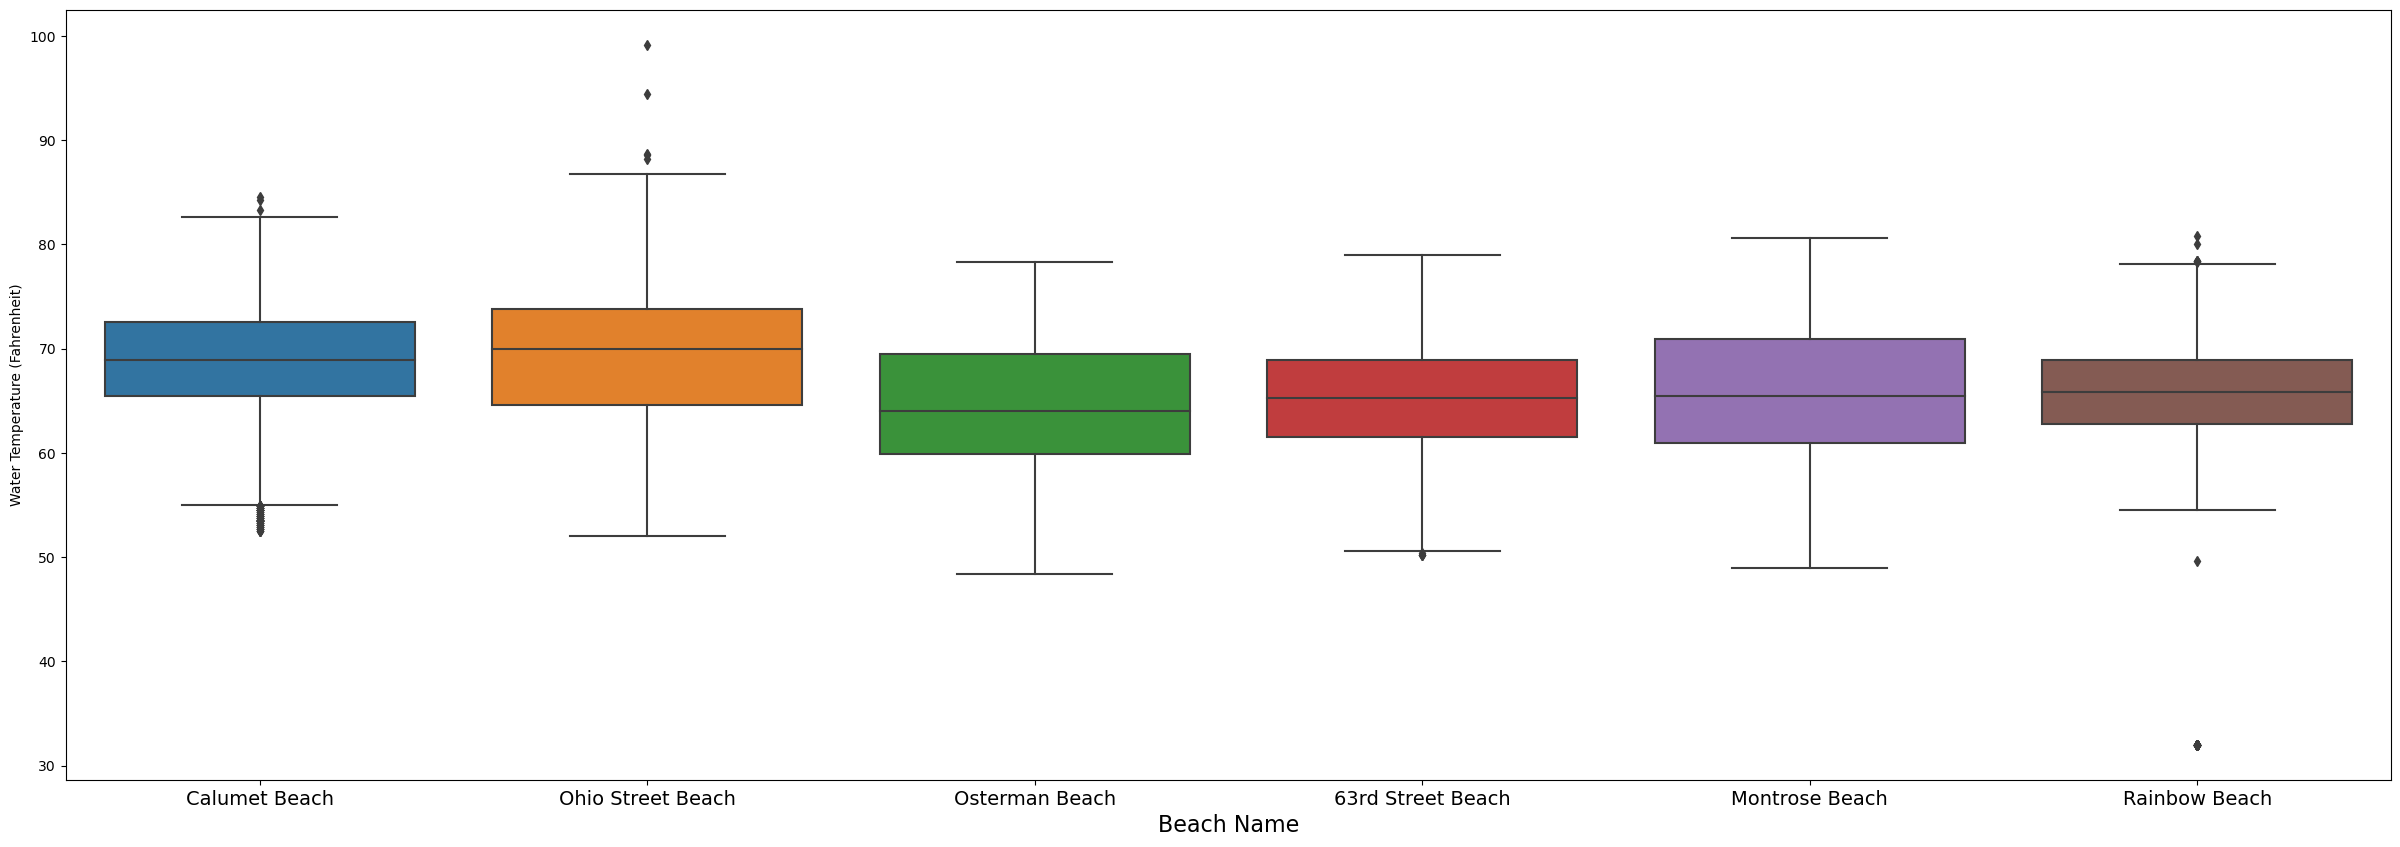

In [101]:
plt.figure(figsize = (30,10))

ax = sns.boxplot(data = df, x = 'Beach Name',y = 'Water Temperature (Fahrenheit)')

ax.set_xticklabels(ax.get_xticklabels(), fontsize=14)
ax.set_xlabel('Beach Name',fontsize=16)
plt.show()

In [102]:
from scipy.stats import pearsonr

obeach = df[(df['Transducer Depth'] > 0) & (df['Beach Name'] == 'Osterman Beach')].reset_index(drop=True)


corr, p = pearsonr(obeach['Water Temperature (Fahrenheit)'],obeach.Month)
print(corr)

0.7248857517053792


,Beach Name,Year,Water Temperature (Fahrenheit)
0,63rd Street Beach,2013,66.020000
1,63rd Street Beach,2014,64.996793
2,63rd Street Beach,2015,65.346156
3,Calumet Beach,2013,73.760000
4,Calumet Beach,2014,68.413484


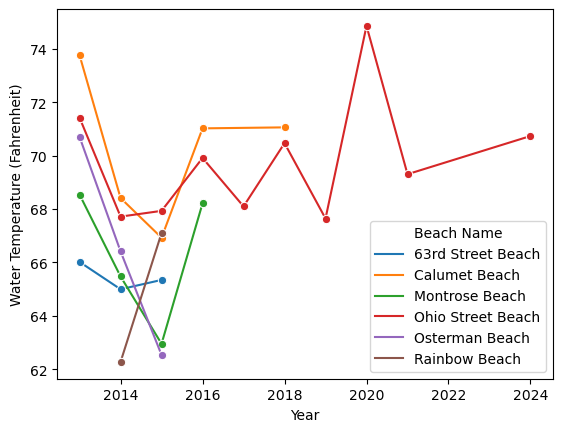

In [103]:

Line = df.groupby(['Beach Name','Year']).agg({'Water Temperature (Fahrenheit)':'mean'}).reset_index()
display(Line.head())

sns.lineplot(x='Year', y='Water Temperature (Fahrenheit)', hue='Beach Name', marker='o', data=Line)
plt.show()

,Beach Name,Year,Battery Life
0,63rd Street Beach,2013,11.000000
1,63rd Street Beach,2014,10.572759
2,63rd Street Beach,2015,10.878477
3,Calumet Beach,2013,9.400000
4,Calumet Beach,2014,11.014904


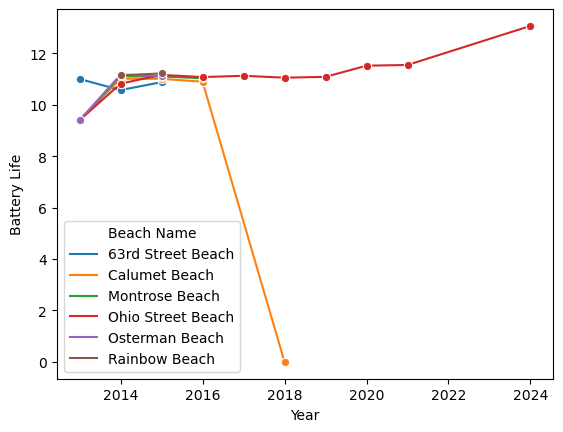

In [104]:
Line2 = df.groupby(['Beach Name','Year']).agg({'Battery Life':'mean'}).reset_index()
display(Line2.head())

sns.lineplot(x='Year', y='Battery Life', hue='Beach Name', marker='o', data=Line2)
plt.show()

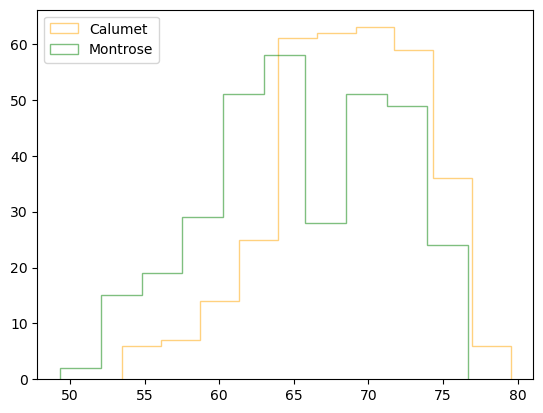

In [105]:
# Compare Calumet & Montrose Beach temps in overlapping histogram

calumet = df[(df['Beach Name'] == 'Calumet Beach') & (df.Year <= 2016)].reset_index(drop=True)
montrose = df[(df['Beach Name'] == 'Montrose Beach') & (df.Year <= 2016)].reset_index(drop=True)


Calumet = calumet.groupby('Measure Date').agg({'Water Temperature (Fahrenheit)':'mean'}).reset_index()
Montrose = montrose.groupby('Measure Date').agg({'Water Temperature (Fahrenheit)':'mean'}).reset_index()


plt.hist(Calumet['Water Temperature (Fahrenheit)'] , color="orange", label="Calumet", alpha=0.5,histtype = 'step')
plt.hist(Montrose['Water Temperature (Fahrenheit)'] , color="green", label="Montrose", alpha=0.5,histtype = 'step')
plt.legend()
plt.show()

,Month,Month Name,Water Temperature (Fahrenheit)
0,5,May,58.711163
1,6,June,65.376273
2,7,July,69.847882
3,8,August,72.342690
4,9,September,68.985346


,Month,Month Name,Water Temperature (Fahrenheit)
0,5,May,55.824449
1,6,June,62.286576
2,7,July,66.242172
3,8,August,69.905862
4,9,September,66.713558


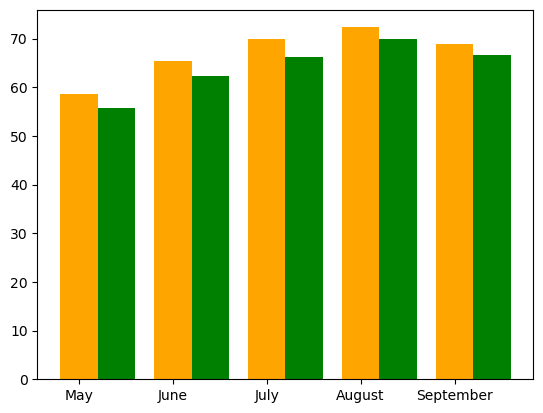

In [109]:
#side-by-side bar
Calumet = calumet.groupby(['Month','Month Name']).agg({'Water Temperature (Fahrenheit)':'mean'}).reset_index()
Montrose = montrose.groupby(['Month','Month Name']).agg({'Water Temperature (Fahrenheit)':'mean'}).reset_index()
display(Calumet)
display(Montrose)

def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d)]
x1 = create_x(2,0.8,1,5)
x2 = create_x(2,0.8,2,5)

ax = plt.subplot()
plt.bar(x1,Calumet['Water Temperature (Fahrenheit)'],color = 'orange')
plt.bar(x2,Montrose['Water Temperature (Fahrenheit)'],color = 'green')
ax.set_xticks(x1)
ax.set_xticklabels(Calumet['Month Name'])
plt.show()